In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor
from sklearn.metrics import RocCurveDisplay,roc_auc_score,accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix,auc, roc_curve
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
columns_to_drop = ['other_fuel1', 'other_fuel2', 'other_fuel3', 'wepp_id', 'generation_gwh_2013',
                   'generation_gwh_2019', 'estimated_generation_gwh', 'country', 'country_long',
                   'name', 'gppd_idnr', 'owner', 'source', 'url', 'commissioning_year']

df = df.drop(columns_to_drop, axis=1)
df

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


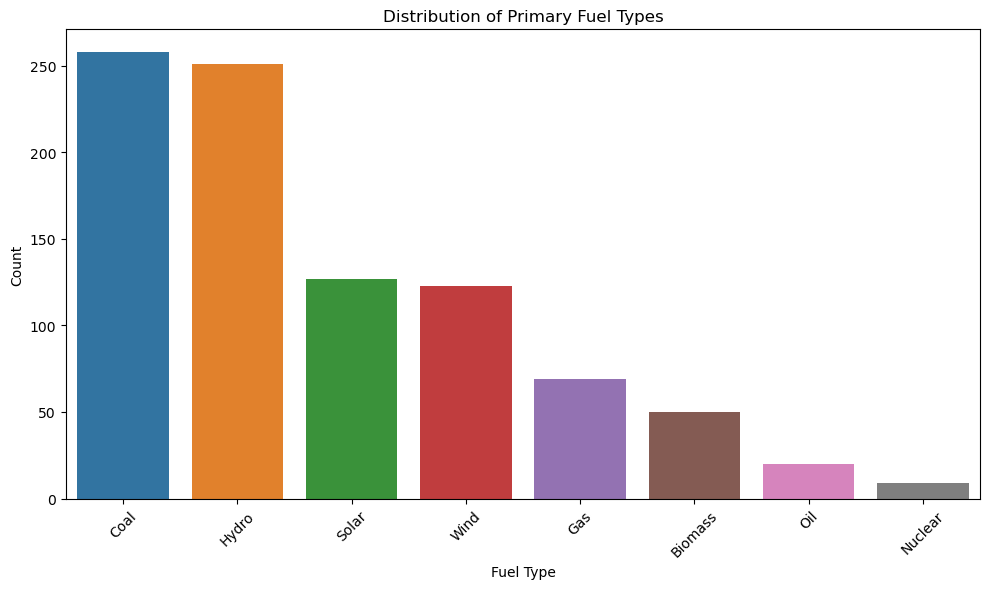

In [7]:
plt.figure(figsize=(10, 6), facecolor='white')
plt.title('Distribution of Primary Fuel Types')
sns.countplot(data=df, x='primary_fuel', order = df['primary_fuel'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

This plot shows the distribution of primary fuel types used by power plants in India. Coal is the most common primary fuel, followed by Hydro, Solar, and Wind. Biomass, Gas, Oil, and Nuclear are less commonly used as primary fuels.

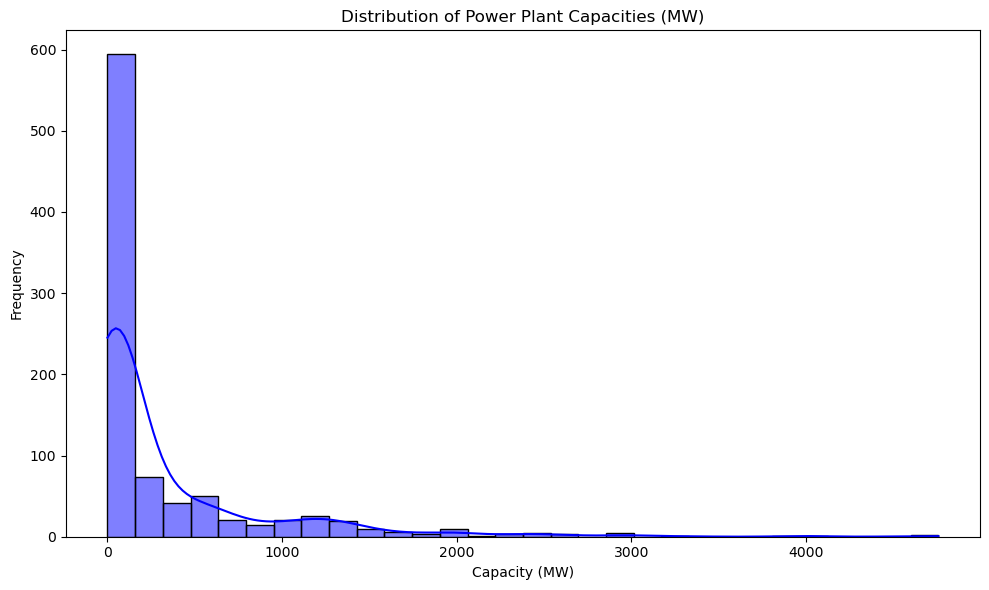

In [8]:
plt.figure(figsize=(10, 6), facecolor='white')
plt.title('Distribution of Power Plant Capacities (MW)')
sns.histplot(data=df, x='capacity_mw', bins=30, kde=True, color='blue')
plt.xlabel('Capacity (MW)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

This histogram displays the distribution of power plant capacities in Megawatts (MW). The majority of power plants have a relatively small capacity, with a significant drop in frequency as capacity increases. This indicates that while there are a few large power plants, most have smaller capacities. The kernel density estimate (KDE) overlay suggests a skewed distribution towards smaller capacities.

<Axes: xlabel='longitude', ylabel='latitude'>

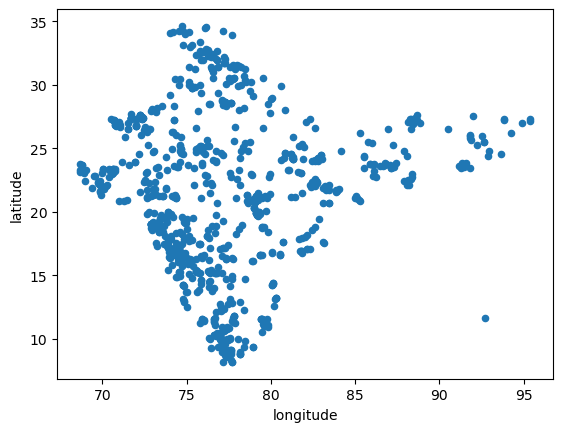

In [9]:
df.plot(x="longitude", y="latitude", kind="scatter")

*  plot showing the geographical distribution of the power plants based on their longitude and latitude coordinates

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   geolocation_source      888 non-null    object 
 5   year_of_capacity_data   519 non-null    float64
 6   generation_gwh_2014     398 non-null    float64
 7   generation_gwh_2015     422 non-null    float64
 8   generation_gwh_2016     434 non-null    float64
 9   generation_gwh_2017     440 non-null    float64
 10  generation_gwh_2018     448 non-null    float64
 11  generation_data_source  449 non-null    object 
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [11]:
df.shape

(907, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   geolocation_source      888 non-null    object 
 5   year_of_capacity_data   519 non-null    float64
 6   generation_gwh_2014     398 non-null    float64
 7   generation_gwh_2015     422 non-null    float64
 8   generation_gwh_2016     434 non-null    float64
 9   generation_gwh_2017     440 non-null    float64
 10  generation_gwh_2018     448 non-null    float64
 11  generation_data_source  449 non-null    object 
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [13]:
df.isnull().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [14]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [15]:
df.to_csv('abhi.csv')

In [16]:
df

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
fuel_mapping = {'Solar': 0, 'Coal': 1, 'Wind': 2, 'Gas': 3, 'Hydro': 4, 'Biomass': 5, 'Oil': 6, 'Nuclear': 7}
df['primary_fuel'] = df['primary_fuel'].map(fuel_mapping)


In [18]:
df

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,1,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,2,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,3,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,1,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,0,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,2,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,1,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df['total_generation_gwh'] = df[['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']].sum(axis=1)


In [20]:
df = df.drop(['generation_data_source', 'geolocation_source', 'year_of_capacity_data'], axis = 1)

In [21]:
check = ['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
                    'generation_gwh_2017', 'generation_gwh_2018']
df = df.drop(check, axis =1 )


In [22]:
df

,capacity_mw,latitude,longitude,primary_fuel,total_generation_gwh
0,2.5,28.1839,73.2407,0,0.000000
1,98.0,24.7663,74.6090,1,0.000000
2,39.2,21.9038,69.3732,2,0.000000
3,135.0,23.8712,91.3602,3,3637.554320
4,1800.0,21.9603,82.4091,1,27859.499736
...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,1786.491525
903,3.0,12.8932,78.1654,0,0.000000
904,25.5,15.2758,75.5811,2,0.000000
905,80.0,24.3500,73.7477,1,0.000000


In [23]:
df = df[df['total_generation_gwh'] != 0]

* without having the information of electricity generation we cant abel to predict the required stuff 

In [24]:
df['latitude'].fillna(df['latitude'].mode()[0], inplace = True)

In [25]:
df['longitude'].fillna(df['longitude'].mode()[0], inplace = True)

In [26]:
df.isnull().sum()

capacity_mw             0
latitude                0
longitude               0
primary_fuel            0
total_generation_gwh    0
dtype: int64

In [27]:
df

,capacity_mw,latitude,longitude,primary_fuel,total_generation_gwh
3,135.0,23.8712,91.3602,3,3637.554320
4,1800.0,21.9603,82.4091,1,27859.499736
5,250.0,23.7689,68.6447,1,5662.606000
6,60.0,10.4547,77.0078,4,509.131550
7,192.0,32.2258,77.2070,4,3330.364500
...,...,...,...,...,...
889,1470.0,22.8725,73.3588,1,30055.555000
890,540.0,20.2727,78.9792,1,5866.018900
893,62.4,30.3033,77.5684,4,984.064550
899,600.0,30.1081,77.3257,1,16223.198930


* finally data set is ready to predict he required stuff


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 3 to 902
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   capacity_mw           432 non-null    float64
 1   latitude              432 non-null    float64
 2   longitude             432 non-null    float64
 3   primary_fuel          432 non-null    int64  
 4   total_generation_gwh  432 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 20.2 KB


In [29]:
df.skew()

capacity_mw             2.193029
latitude               -0.221274
longitude               0.788283
primary_fuel            0.199613
total_generation_gwh    3.591152
dtype: float64

In [30]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

b =(q3.total_generation_gwh + (1.5 * iqr.total_generation_gwh))
c = np.where(df['total_generation_gwh'] > b)
df =df.drop(df.index[c])
df.shape
df.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,total_generation_gwh
0,3,135.0,23.8712,91.3602,3,3637.554320
1,4,1800.0,21.9603,82.4091,1,27859.499736
2,5,250.0,23.7689,68.6447,1,5662.606000
3,6,60.0,10.4547,77.0078,4,509.131550
4,7,192.0,32.2258,77.2070,4,3330.364500
...,...,...,...,...,...,...
404,889,1470.0,22.8725,73.3588,1,30055.555000
405,890,540.0,20.2727,78.9792,1,5866.018900
406,893,62.4,30.3033,77.5684,4,984.064550
407,899,600.0,30.1081,77.3257,1,16223.198930


In [31]:
df.skew() 

capacity_mw             1.351008
latitude               -0.207084
longitude               0.864633
primary_fuel            0.078487
total_generation_gwh    1.255061
dtype: float64

 * after removing the outliers skewness slightly reduced

In [32]:
x = df.drop(['primary_fuel'], axis = 1)
y = df['primary_fuel']

In [33]:
strategy = {1: 183, 3: 183, 4: 183, 6: 183, 7: 183} 
oversampler = SMOTE(sampling_strategy=strategy, k_neighbors=4)
xo, yo = oversampler.fit_resample(x, y)


In [34]:
yo.value_counts()

3    183
1    183
4    183
6    183
7    183
Name: primary_fuel, dtype: int64

In [76]:
ba = 0
brs= 0
for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(xo,yo, test_size = 0.20, random_state = i)
    lr = RandomForestClassifier()
    lr.fit(x_train, y_train)
    pdt = lr.predict(x_test)
    ac = accuracy_score(y_test, pdt)
    if ac > ba:
        ba= ac
        brs = i
print( ba , 'and', brs)

0.9344262295081968 and 63


In [77]:
x_train, x_test, y_train, y_test = train_test_split(xo, yo, test_size=0.30, random_state=63)

## model building

In [78]:
classifiers = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
               GradientBoostingClassifier(),SVC(),KNeighborsClassifier()]

In [79]:
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        result_type = "train"
    else:
        pred = clf.predict(x_test)
        result_type = "test"

    accuracy = accuracy_score(y_train if train else y_test, pred) * 100
    print(f'\n ============ {result_type} result ==========')
    print(f'{result_type} result is: {accuracy:.2f}%')
for clf in classifiers:
    print(f'\n================== {clf.__class__.__name__} ==================')
    clf.fit(x_train, y_train)
    metric_score(clf, x_train, x_test, y_train, y_test, train=True)
    metric_score(clf, x_train, x_test, y_train, y_test, train=False)


================== LogisticRegression ==================

 ============ train result ==========
train result is: 52.03%

 ============ test result ==========
test result is: 56.73%

================== DecisionTreeClassifier ==================

 ============ train result ==========
train result is: 100.00%

 ============ test result ==========
test result is: 82.55%

================== RandomForestClassifier ==================

 ============ train result ==========
train result is: 100.00%

 ============ test result ==========
test result is: 88.73%

================== AdaBoostClassifier ==================

 ============ train result ==========
train result is: 38.12%

 ============ test result ==========
test result is: 37.45%

================== GradientBoostingClassifier ==================

 ============ train result ==========
train result is: 99.53%

 ============ test result ==========
test result is: 85.82%

================== SVC ==================

 ============ train result =

In [80]:
from sklearn.model_selection import cross_val_score
for clf in classifiers:
    clf.fit(x_train, y_train)

    score = cross_val_score(clf, xo, yo, cv=5) 

    print(f'\n================== {clf.__class__.__name__} ==================')
    print("Cross-Validation Scores:", score)
    print("Mean Cross-Validation Score:", np.mean(score))
    y_pred = clf.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f"Difference between Accuracy score and cross-validation of{ clf} score is", test_accuracy - np.mean(score))


================== LogisticRegression ==================
Cross-Validation Scores: [0.55737705 0.55191257 0.52459016 0.5136612  0.53005464]
Mean Cross-Validation Score: 0.53551912568306
Test Accuracy: 0.5673
Difference between Accuracy score and cross-validation ofLogisticRegression() score is 0.031753601589667224

================== DecisionTreeClassifier ==================
Cross-Validation Scores: [0.78142077 0.83606557 0.84699454 0.81967213 0.80874317]
Mean Cross-Validation Score: 0.8185792349726775
Test Accuracy: 0.8400
Difference between Accuracy score and cross-validation ofDecisionTreeClassifier() score is 0.021420765027322486

================== RandomForestClassifier ==================
Cross-Validation Scores: [0.86338798 0.86338798 0.86338798 0.83060109 0.85245902]
Mean Cross-Validation Score: 0.8546448087431694
Test Accuracy: 0.8909
Difference between Accuracy score and cross-validation ofRandomForestClassifier() score is 0.03626428216592148

================== AdaBoostClass

In [81]:
good_grid = {'criterion' : ['gini', 'entropy'],'n_estimators': [None,50, 100, 150],'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

In [82]:
rfc= RandomForestClassifier()
gcv = GridSearchCV(estimator = rfc, param_grid = good_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [None, 50, 100, 150]},
             scoring='accuracy')

In [83]:
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [None, 50, 100, 150]},
             scoring='accuracy')

In [84]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [97]:
final1 = RandomForestClassifier(n_estimators =  100,
                                max_depth =20,
                                min_samples_split =  2,
                                min_samples_leaf = 1,
                                criterion =  'entropy')


In [98]:
final1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20)

In [101]:
pred = final1.predict(x_test)
pred
acc = accuracy_score(y_test, pred)
print(acc*100)

89.0909090909091


In [182]:
import joblib
joblib.dump(final, "fule.pkl")

['fule.pkl']

## finding capacity MW  >>>>

In [108]:
df

,capacity_mw,latitude,longitude,primary_fuel,total_generation_gwh
3,135.0,23.8712,91.3602,3,3637.554320
4,1800.0,21.9603,82.4091,1,27859.499736
5,250.0,23.7689,68.6447,1,5662.606000
6,60.0,10.4547,77.0078,4,509.131550
7,192.0,32.2258,77.2070,4,3330.364500
...,...,...,...,...,...
889,1470.0,22.8725,73.3588,1,30055.555000
890,540.0,20.2727,78.9792,1,5866.018900
893,62.4,30.3033,77.5684,4,984.064550
899,600.0,30.1081,77.3257,1,16223.198930


In [110]:
x1 = df.drop(['capacity_mw'], axis = 1)
y1 = df['capacity_mw']

In [102]:
regressor = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),
             GradientBoostingRegressor(),SVR(),KNeighborsRegressor()]

In [134]:
ba = 0
brs= 0
for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size = 0.30, random_state = i)
    lr = GradientBoostingRegressor()
    lr.fit(x_train, y_train)
    pdt = lr.predict(x_test)
    ac = r2_score(y_test, pdt)
    if ac > ba:
        ba= ac
        brs = i
print( ba , 'and', brs)

0.7589360886083365 and 475


In [149]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=475)

In [150]:
def metric_score(rg, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_score = rg.predict(x_train)
        result_type = "train"
    else:
        y_score = rg.predict(x_test)
        result_type = "test"

    mse = mean_squared_error(y_train if train else y_test, y_score)
    r2 = r2_score(y_train if train else y_test, y_score) * 100
    
    print(f'\n ============ {result_type} result ==========')
    print(f'{result_type} R2 score: {r2:.2f}%')
    print(f'{result_type}  MSE : {mse:.4f}')


In [151]:
for rg in regressor:
    print(f'\n================== {rg.__class__.__name__} ==================')
    rg.fit(x_train, y_train)
    metric_score(rg, x_train, x_test, y_train, y_test, train=True)
    metric_score(rg, x_train, x_test, y_train, y_test, train=False)


================== LinearRegression ==================

 ============ train result ==========
train R2 score: 59.93%
train  MSE : 117823.0296

 ============ test result ==========
test R2 score: 70.13%
test  MSE : 69640.1692

================== DecisionTreeRegressor ==================

 ============ train result ==========
train R2 score: 100.00%
train  MSE : 0.0000

 ============ test result ==========
test R2 score: 41.12%
test  MSE : 137278.6139

================== RandomForestRegressor ==================

 ============ train result ==========
train R2 score: 94.31%
train  MSE : 16719.1127

 ============ test result ==========
test R2 score: 71.51%
test  MSE : 66417.9277

================== AdaBoostRegressor ==================

 ============ train result ==========
train R2 score: 68.46%
train  MSE : 92750.4305

 ============ test result ==========
test R2 score: 59.40%
test  MSE : 94657.6870

================== GradientBoostingRegressor ==================

 ============ train resu

In [155]:
param_grid = {'n_estimators': [10,20,50, 100, 200], 'max_depth': [None, 10, 20, 30],'min_samples_split': [1,2, 5, 10],'min_samples_leaf': [1, 2, 4]}
rf_reg = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}


In [180]:
final  = RandomForestRegressor(max_depth=None,
 min_samples_leaf= 4,
 min_samples_split=5,
 n_estimators= 20)
final.fit(x_train, y_train)
pred = final.predict(x_test)
ac = r2_score(y_test, pred)
ac * 100

72.85237169649987

In [181]:
import joblib
joblib.dump(final, "capacity_mw.pkl")

['capacity_mw.pkl']